## Goal of this Notebook
The goal of this notebook is to see if momentum has gotten stronger, weaker, or stayed the same over time.
1. Split daily movements into 5 periods
2. Compare the strength of momentum over the last few years for one stock
3. Compare the average strength of momentum over a a few span for all stocks

Let's use SPY since it will be a good reflection of the trends in relatively large cap stocks

In [1]:
from stock_utils import *

In [2]:
df = pd.DataFrame()
df = df.from_csv('stock_data/spy.csv')
daily_movements = get_price_movements(df)
movement_categories = categorize_movements(daily_movements)

In [3]:
period_len = int(len(daily_movements) / 5)

In [4]:
p1 = daily_movements[0:period_len]
p2 = daily_movements[period_len+1 :2*period_len]
p3 = daily_movements[2*period_len+1:3*period_len]
p4 = daily_movements[3*period_len+1:4*period_len]
p5 = daily_movements[4*period_len+1:5*period_len]

In [5]:
c1 = categorize_movements(p1)
c2 = categorize_movements(p2)
c3 = categorize_movements(p3)
c4 = categorize_movements(p4)
c5 = categorize_movements(p5)

In [6]:
movement_periods = [p1, p2, p3, p4, p5]
category_periods = [c1, c2, c3, c4, c5]

In [7]:
def plot_period(category_periods, period_number):
    vbd_count = count_movement_category(category_periods[period_number], 'vbd')
    bd_count = count_movement_category(category_periods[period_number], 'bd')
    md_count = count_movement_category(category_periods[period_number], 'md')
    sd_count = count_movement_category(category_periods[period_number], 'sd')
    sg_count = count_movement_category(category_periods[period_number], 'sg')
    mg_count = count_movement_category(category_periods[period_number], 'mg')
    bg_count = count_movement_category(category_periods[period_number], 'bg')
    vbg_count = count_movement_category(category_periods[period_number], 'vbg')
    total_cat_count = len(category_periods[period_number])
    
    p_vbd = vbd_count / total_cat_count
    p_bd = bd_count / total_cat_count
    p_md = md_count / total_cat_count
    p_sd = sd_count / total_cat_count
    p_sg = sg_count / total_cat_count
    p_mg = mg_count / total_cat_count
    p_bg = bg_count / total_cat_count
    p_vbg = vbd_count / total_cat_count
    
    cat_counts = [vbd_count, bd_count, md_count, sd_count, sg_count, mg_count, bg_count, vbg_count]
    cat_probs = [p_vbd, p_bd, p_md, p_sd, p_sg, p_mg, p_bg, p_vbg]
    two_day_trends = get_trends(category_periods[period_number], 2)
    
    plot_two_day_probability_bar_graph('vbd', vbd_count, two_day_trends, cat_probs)
    plot_two_day_probability_bar_graph('bd', bd_count, two_day_trends, cat_probs)
    plot_two_day_probability_bar_graph('md', md_count, two_day_trends, cat_probs)
    plot_two_day_probability_bar_graph('sd', sd_count, two_day_trends, cat_probs)
    plot_two_day_probability_bar_graph('sg', sg_count, two_day_trends, cat_probs)
    plot_two_day_probability_bar_graph('mg', mg_count, two_day_trends, cat_probs)
    plot_two_day_probability_bar_graph('bg', bg_count, two_day_trends, cat_probs)
    plot_two_day_probability_bar_graph('vbg', vbg_count, two_day_trends, cat_probs)
    

## SPY: First Period
Roughly 2007 - 2009

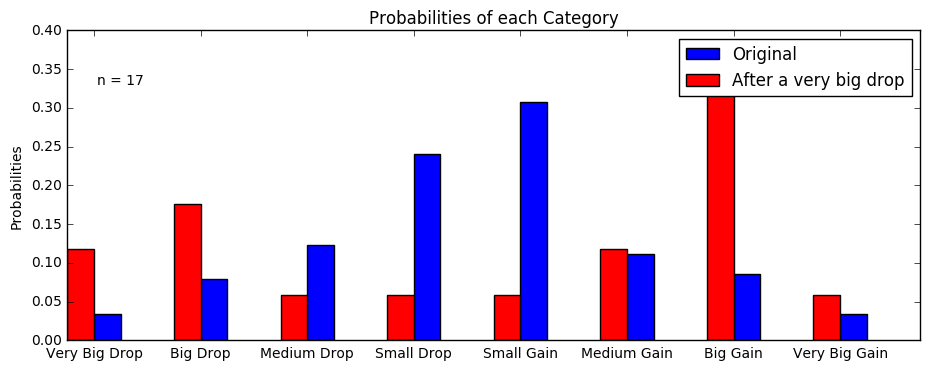

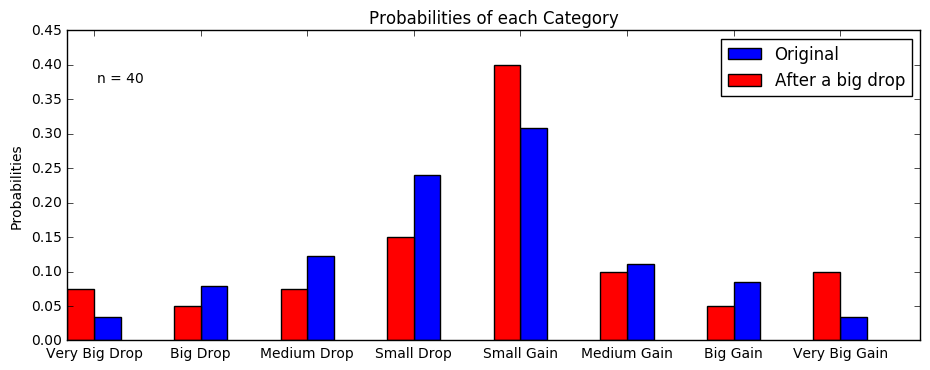

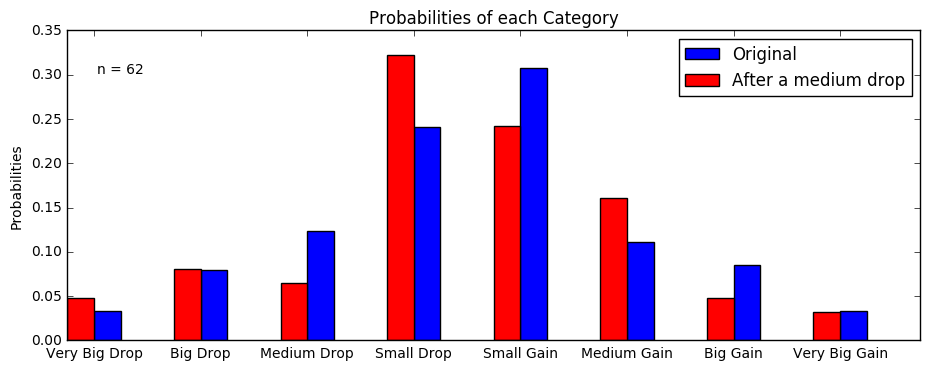

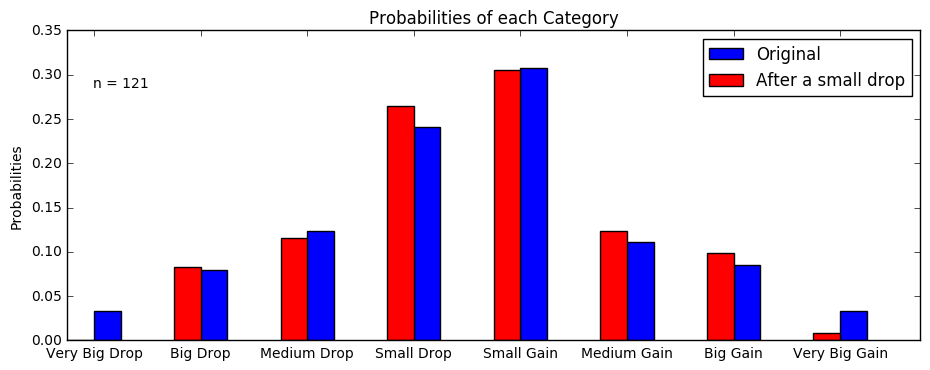

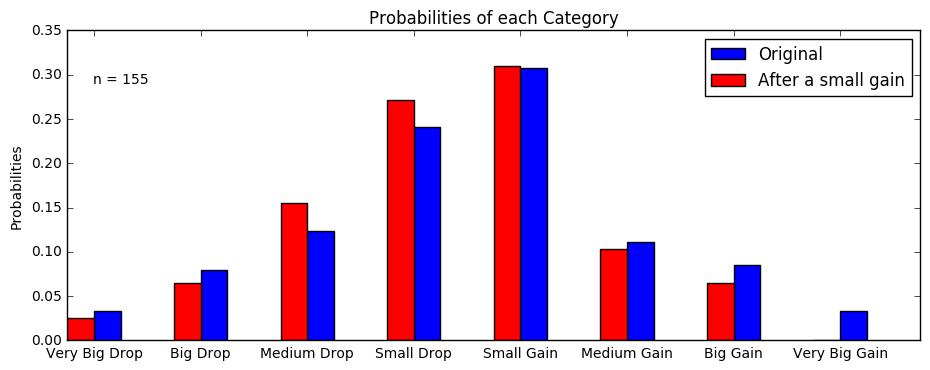

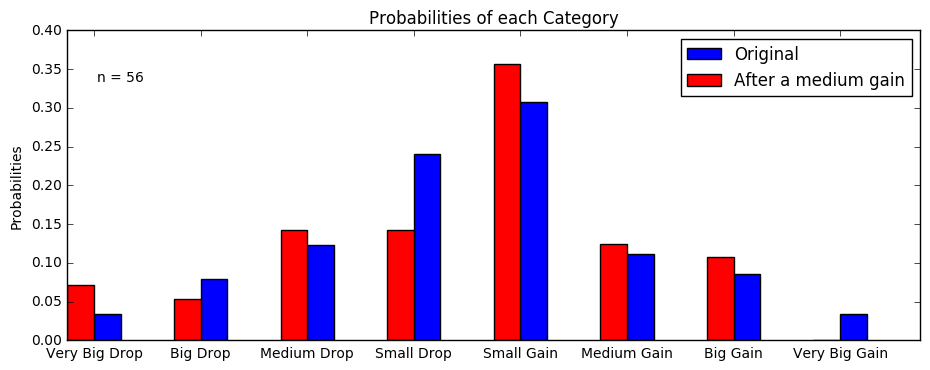

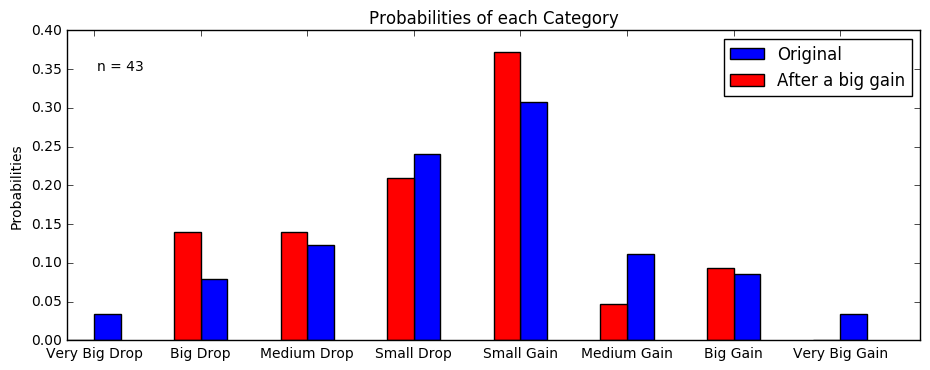

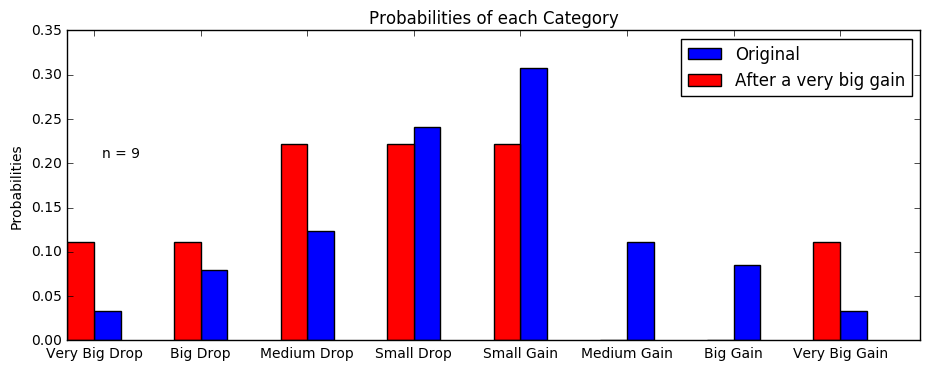

In [8]:
plot_period(category_periods, 0)    
plt.show()

## Second Period
Roughly 2010 - 2011

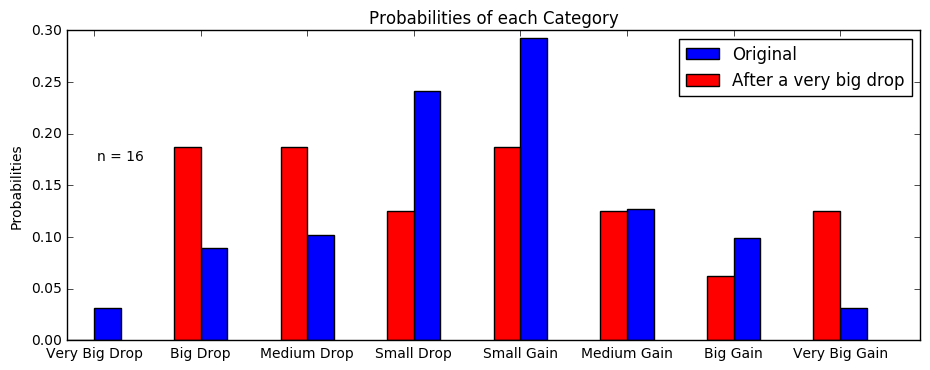

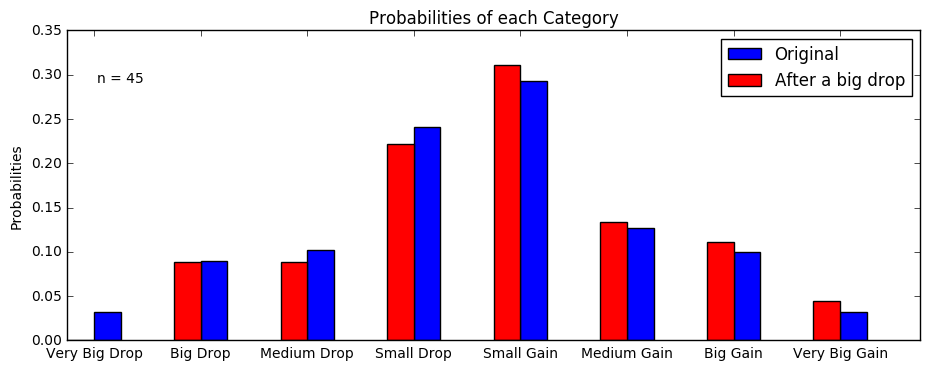

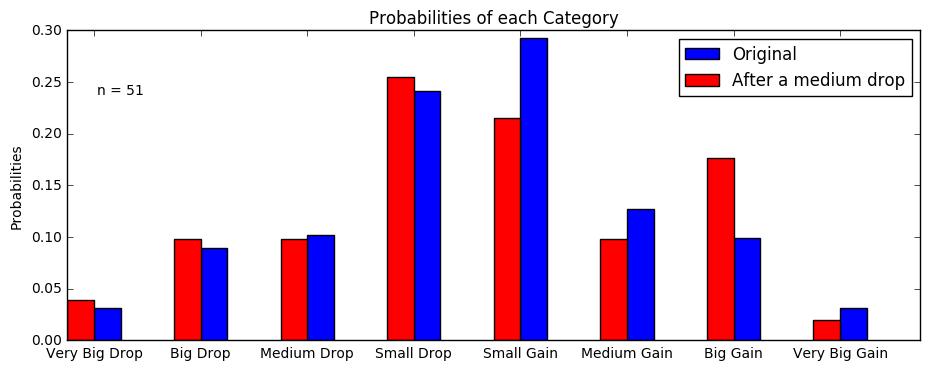

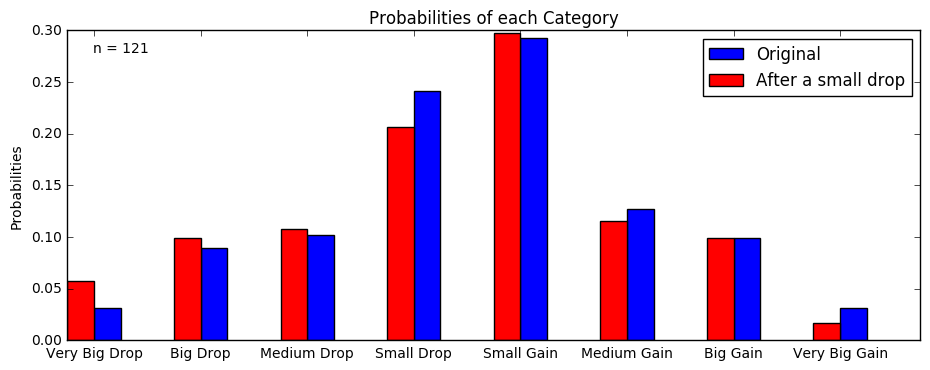

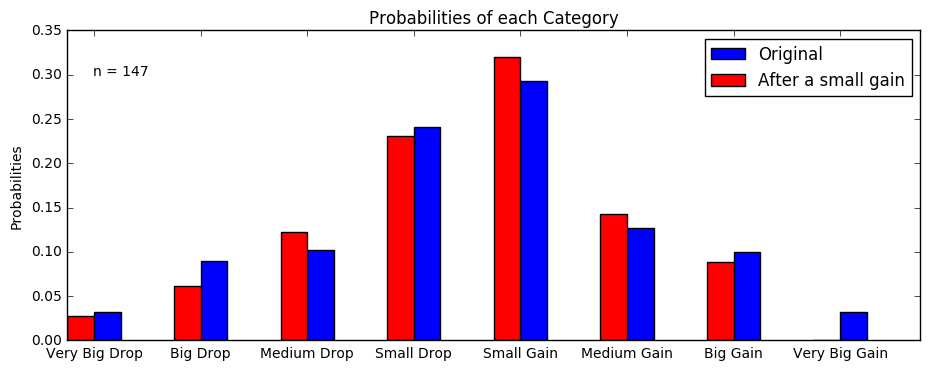

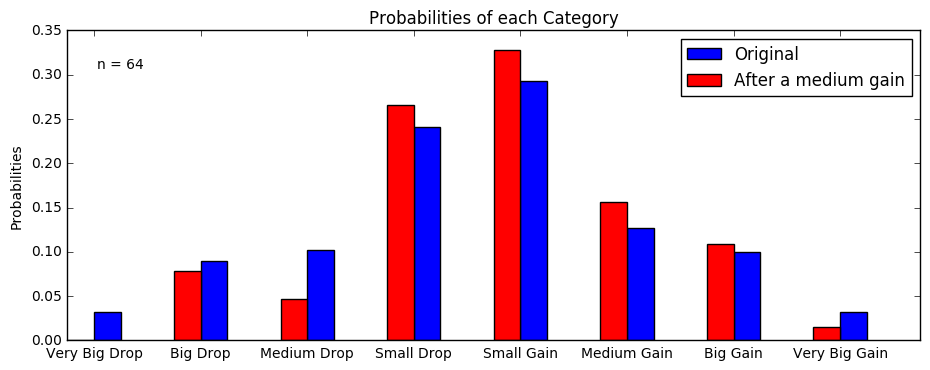

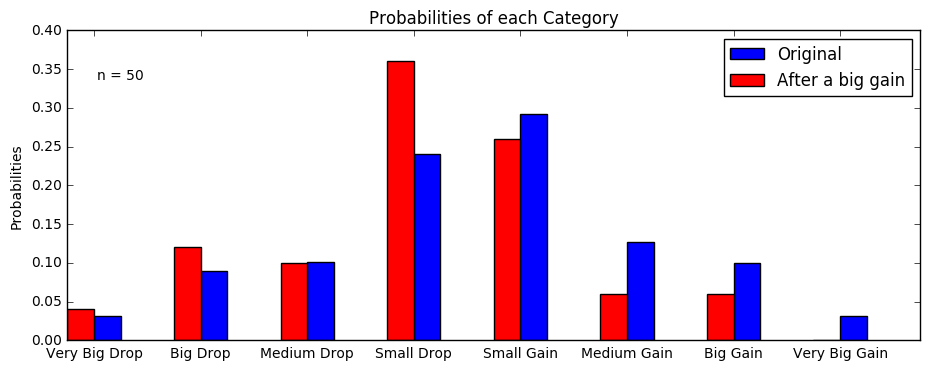

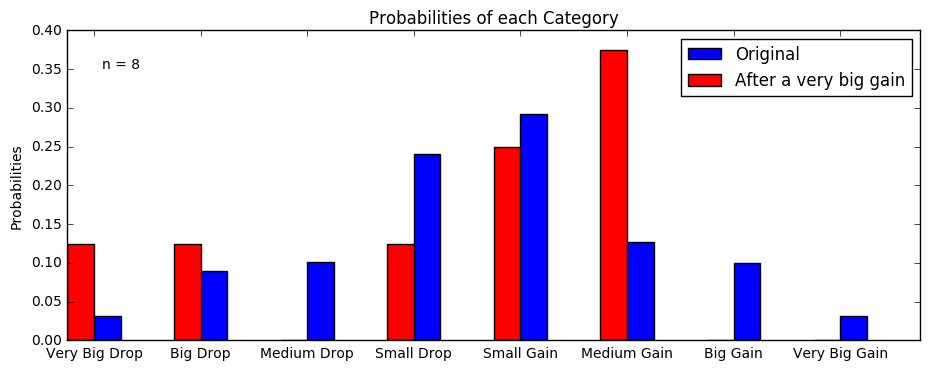

In [9]:
plot_period(category_periods, 1)    
plt.show()

## Third Period
Roughly 2012 - 2013

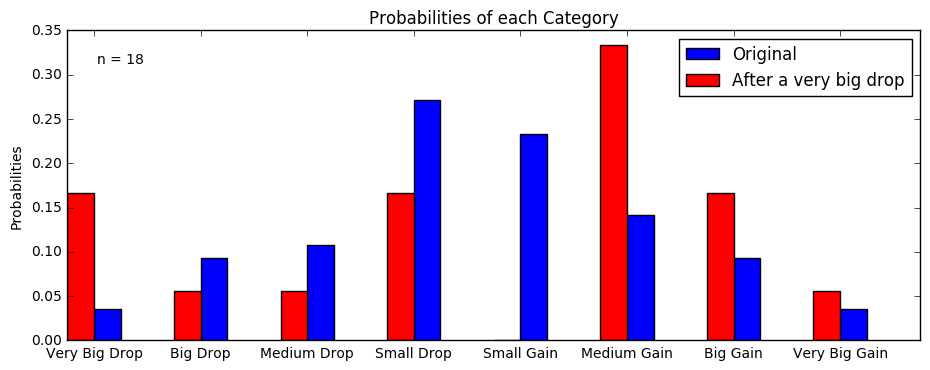

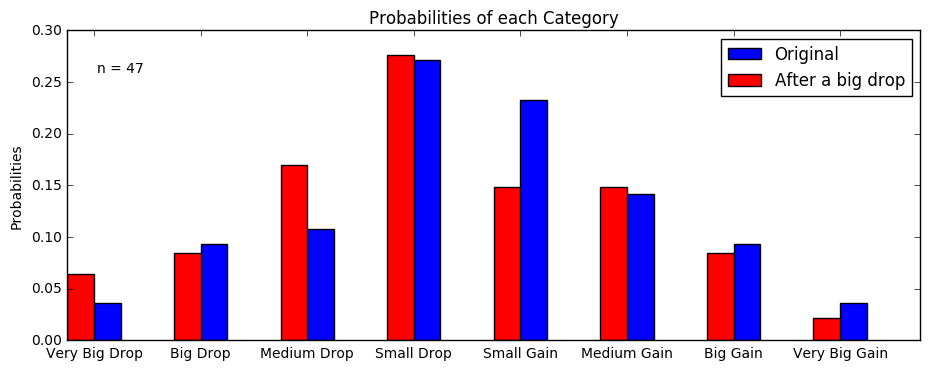

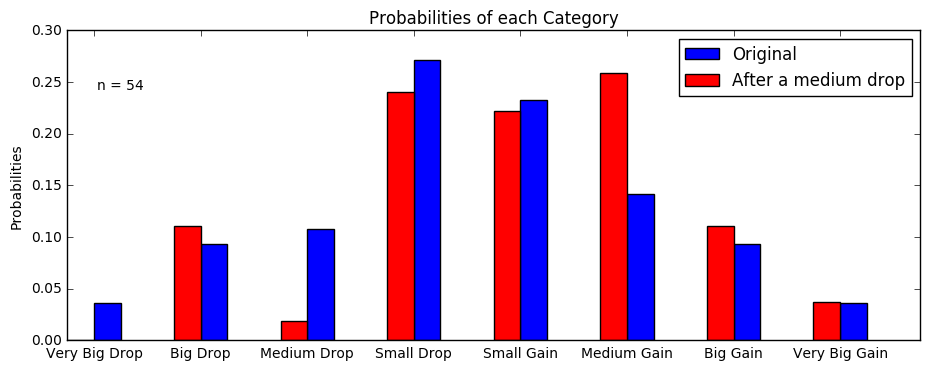

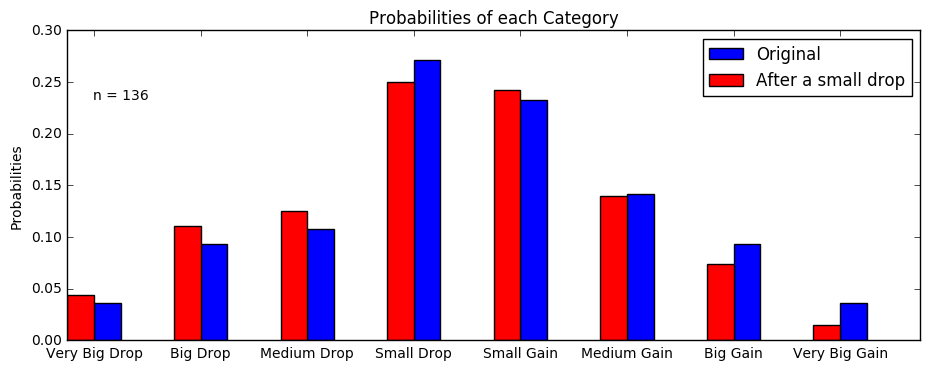

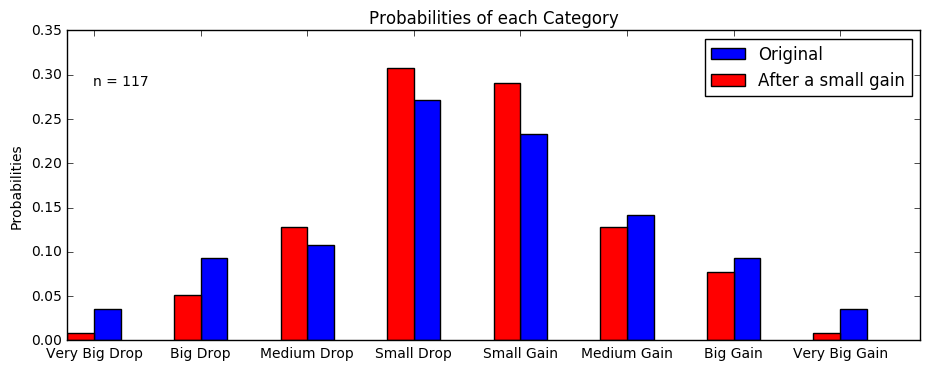

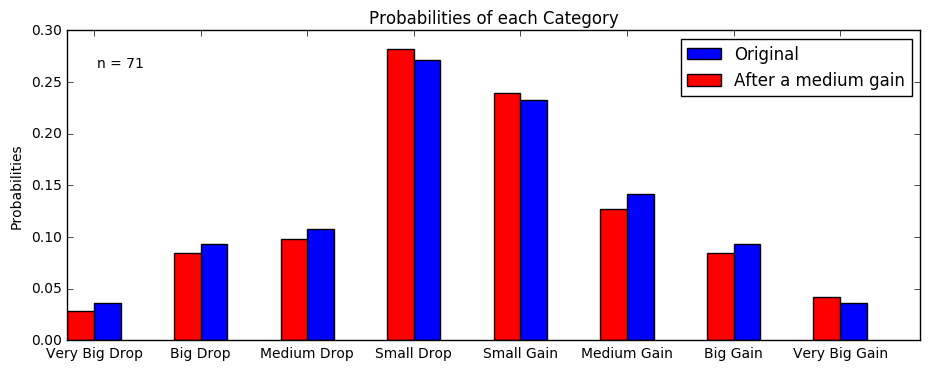

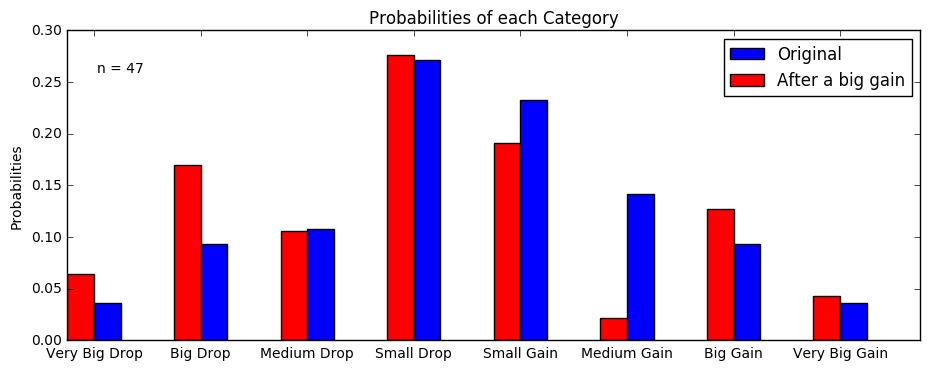

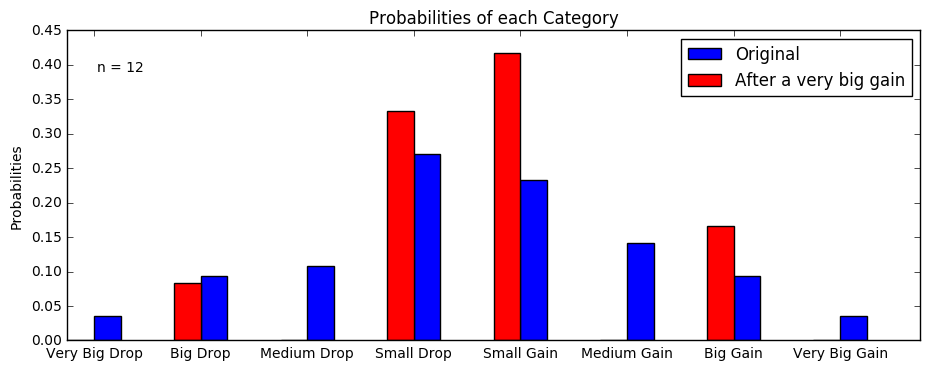

In [10]:
plot_period(category_periods, 2)    
plt.show()

## Fourth Period
Roughly 2014 - 2015

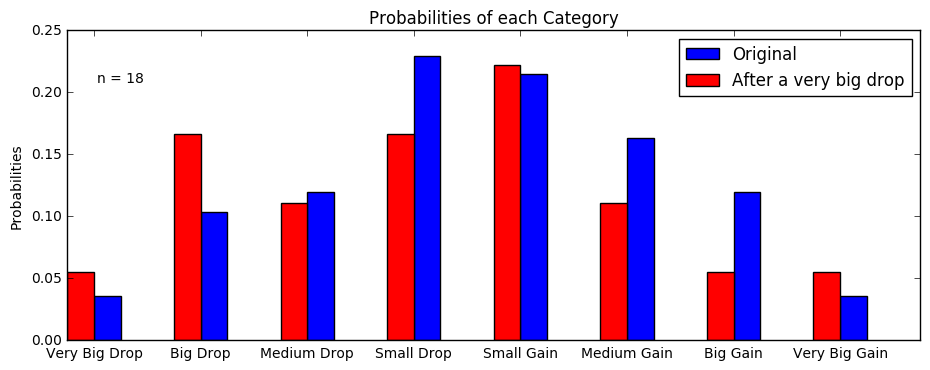

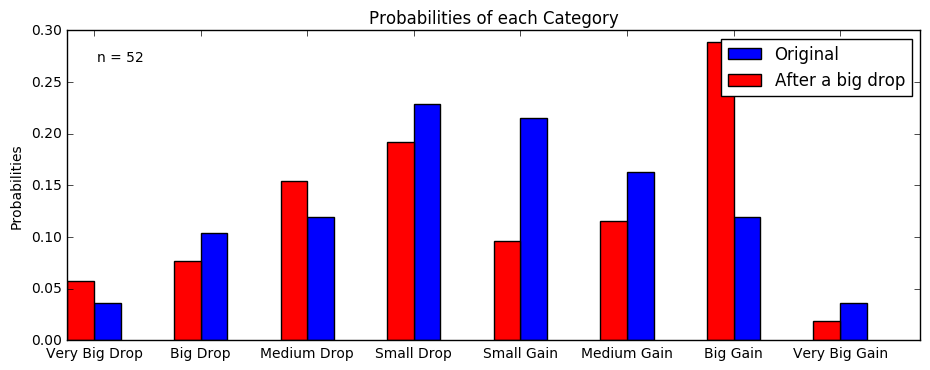

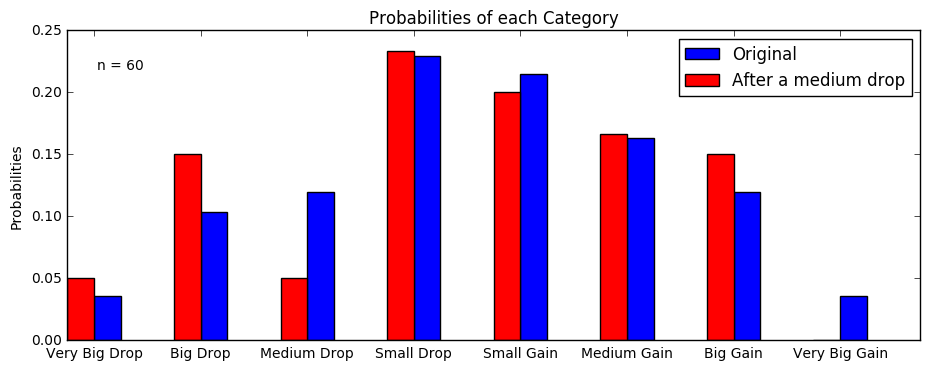

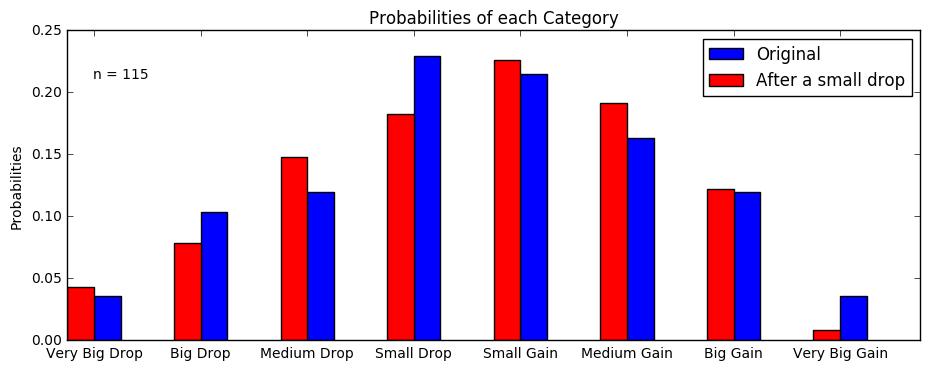

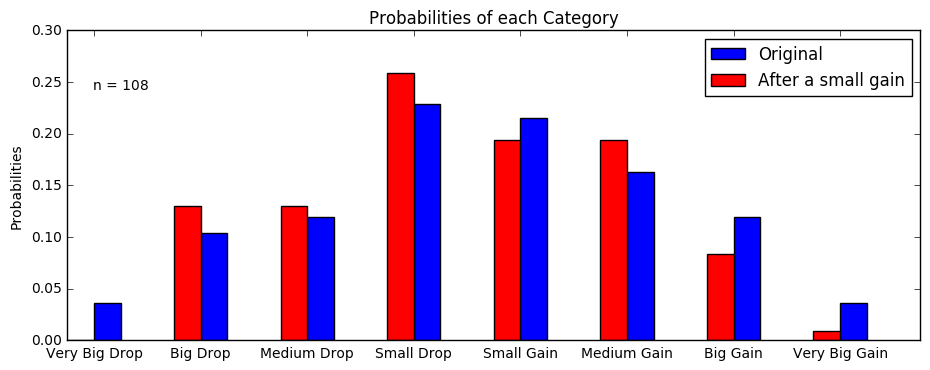

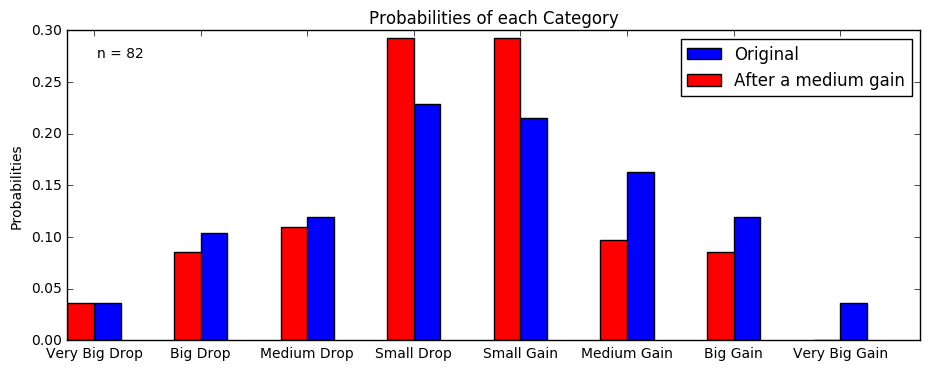

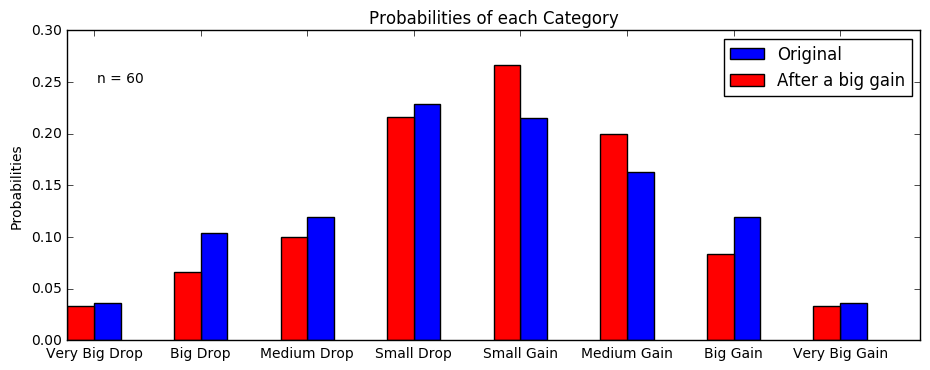

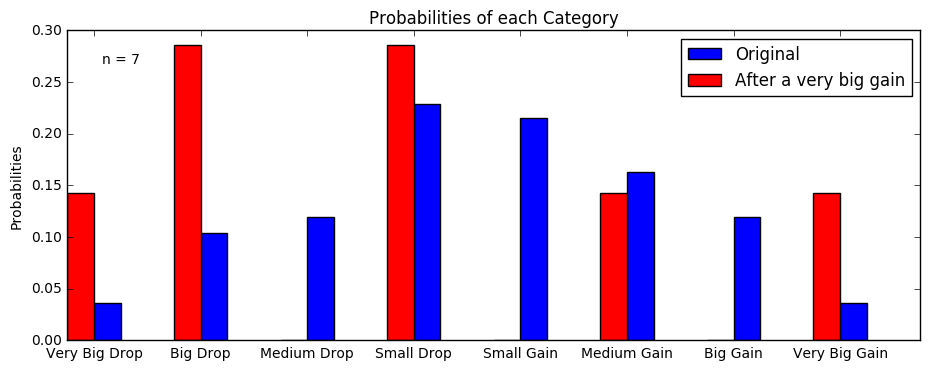

In [11]:
plot_period(category_periods, 3)    
plt.show()

## Fifth Period
Roughly 2016 - 2017

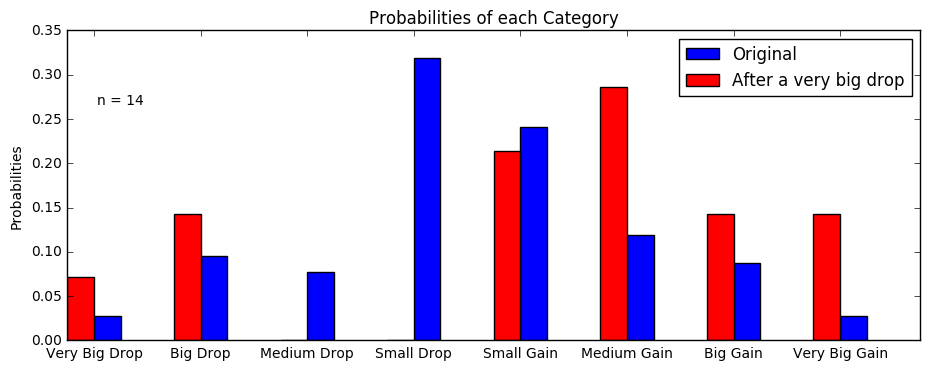

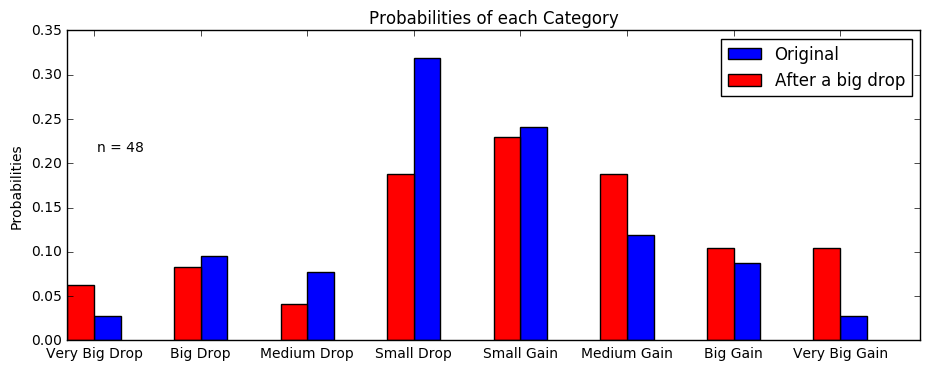

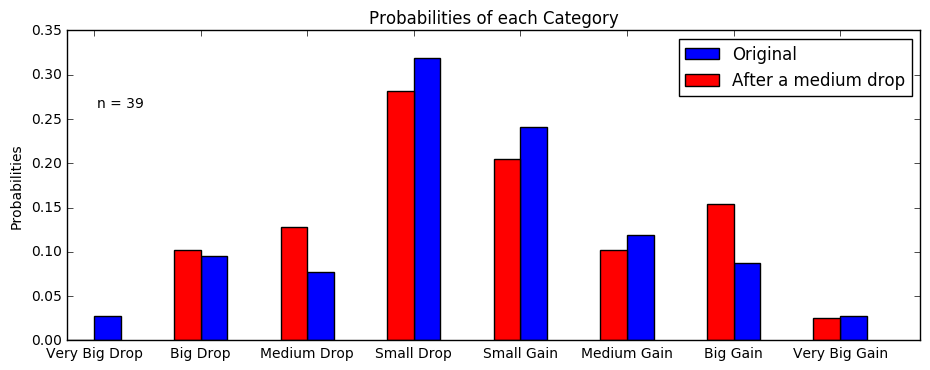

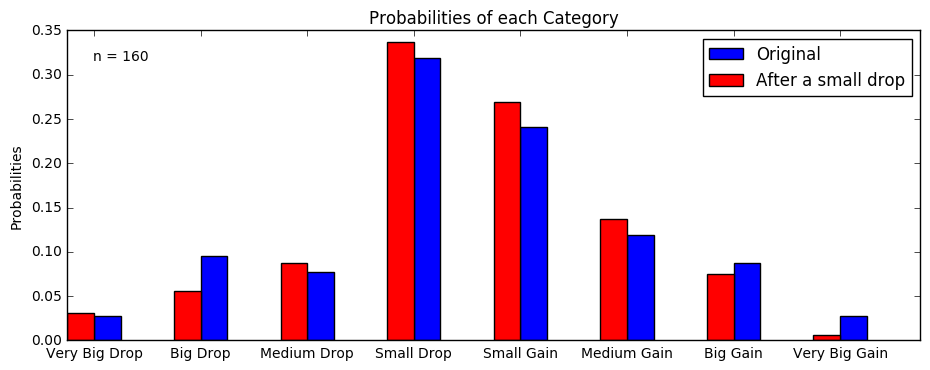

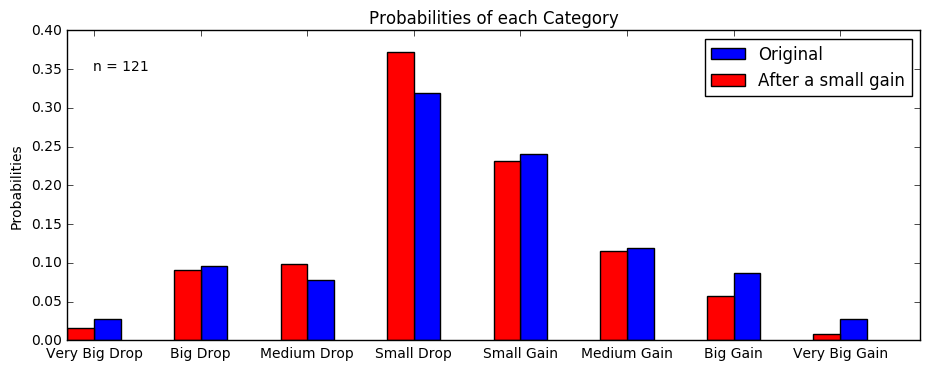

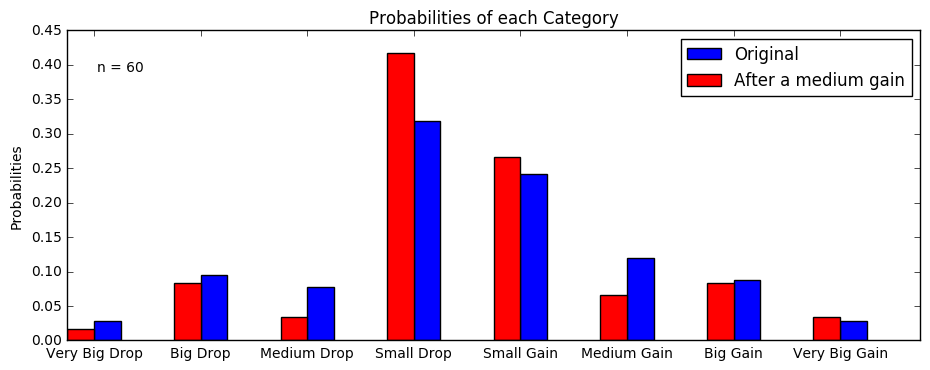

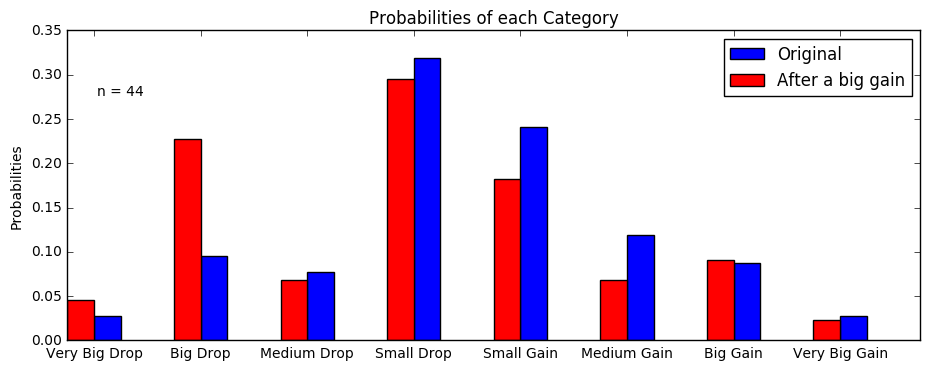

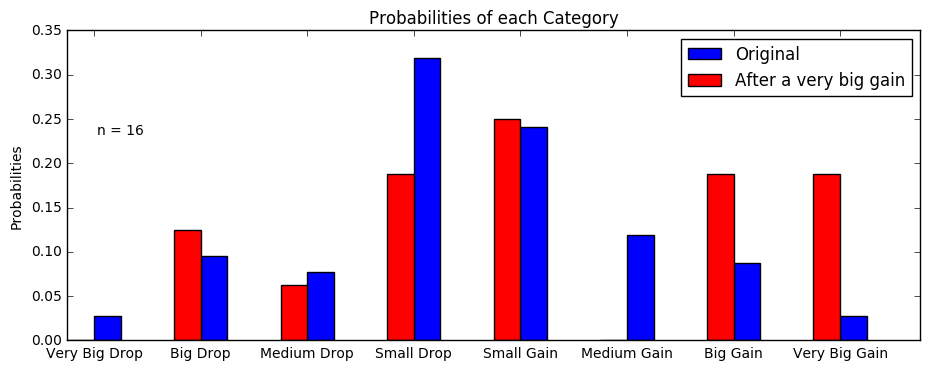

In [12]:
plot_period(category_periods, 4)    
plt.show()

## Composite

In [13]:
def plot_full(category_periods, conditional_category, composite_categories):
    """Plot all 5 periods on one bar graph for a specified condtional category"""
    plt.figure(figsize=(11,4))
    categories = ('Very Big Drop', 'Big Drop', 'Medium Drop', 'Small Drop', 'Small Gain', 'Medium Gain', 'Big Gain', 'Very Big Gain')
    all_categories = ['vbd', 'bd', 'md', 'sd', 'sg', 'mg', 'bg', 'vbg']
    ind = np.arange(8)
    width = 0.1
    category_full_names = {'vbd':'very big drop', 'bd':'big drop', 'md':'medium drop', 'sd':'small drop',
                           'vbg':'very big gain', 'bg':'big gain', 'mg':'medium gain', 'sg':'small gain'}
    
    ## For each period, plot the conditional probability after the conditional_category provided is observed
    for i in range(len(category_periods)):
        conditional_category_count = count_movement_category(category_periods[i], conditional_category)
        
        vbd_count = count_movement_category(category_periods[i], 'vbd')
        bd_count = count_movement_category(category_periods[i], 'bd')
        md_count = count_movement_category(category_periods[i], 'md')
        sd_count = count_movement_category(category_periods[i], 'sd')
        sg_count = count_movement_category(category_periods[i], 'sg')
        mg_count = count_movement_category(category_periods[i], 'mg')
        bg_count = count_movement_category(category_periods[i], 'bg')
        vbg_count = count_movement_category(category_periods[i], 'vbg')
        total_cat_count = len(category_periods[i])
    
        p_vbd = vbd_count / total_cat_count
        p_bd = bd_count / total_cat_count
        p_md = md_count / total_cat_count
        p_sd = sd_count / total_cat_count
        p_sg = sg_count / total_cat_count
        p_mg = mg_count / total_cat_count
        p_bg = bg_count / total_cat_count
        p_vbg = vbd_count / total_cat_count
    
        cat_counts = [vbd_count, bd_count, md_count, sd_count, sg_count, mg_count, bg_count, vbg_count]
        cat_probs = [p_vbd, p_bd, p_md, p_sd, p_sg, p_mg, p_bg, p_vbg]
        two_day_trends = get_trends(category_periods[i], 2)
    
        #plot_two_day_probability_bar_graph('vbd', vbd_count, two_day_trends, cat_probs)
        
        ## Plot the bars side by side
        two_day_probs = []
        for next_day in all_categories:
            two_day_name = conditional_category +'_' + next_day
            two_day_count = count_trends(two_day_trends, two_day_name)
            two_day_prob = two_day_count / conditional_category_count
            two_day_probs.append(two_day_prob)
        pl = plt.bar(ind + (i * width), two_day_probs, width, color='r', label='t = ' + str(i))

    ## Plot the composite of all periods
    conditional_category_count = count_movement_category(composite_categories, conditional_category)
    two_day_trends = get_trends(composite_categories, 2)
    two_day_probs = []
    for next_day in all_categories:
        two_day_name = conditional_category +'_' + next_day
        two_day_count = count_trends(two_day_trends, two_day_name)
        two_day_prob = two_day_count / conditional_category_count
        two_day_probs.append(two_day_prob)
    pl = plt.bar(ind + (5 * width), two_day_probs, width, color='b', label='Aggregate')
    
    plt.ylabel('Probabilities')
    plt.title('Probabilities of each category after a ' + category_full_names[conditional_category])
    plt.xticks(ind+width, categories)
    plt.legend()

## SPY: Composite

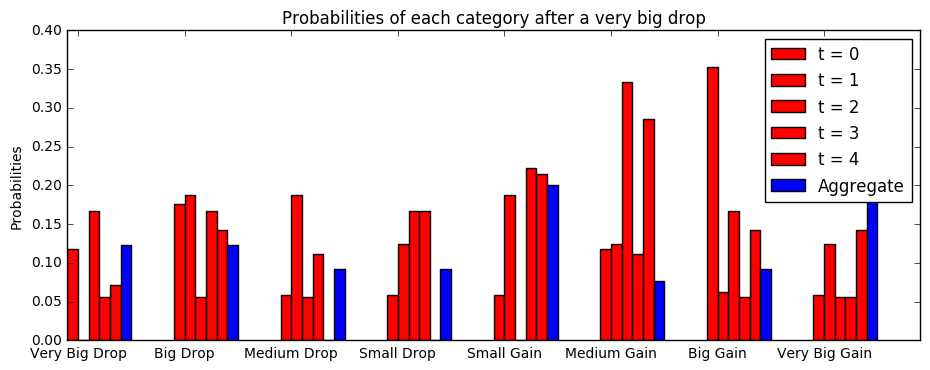

In [14]:
plot_full(category_periods, 'vbd', movement_categories)
plt.show()

#### Q: Why is the blue bar not the average of all the reds?
This is likely do to how the parameters for different categories change from year to year. That is, mu and sigma are different for different periods, so something that is considered a very big gain this year may just be a big gain next year.  
To check, we could specify concretely what we want in each category, but I'm not going to do that at this time.

This is a shortcoming of this way of doing things.  

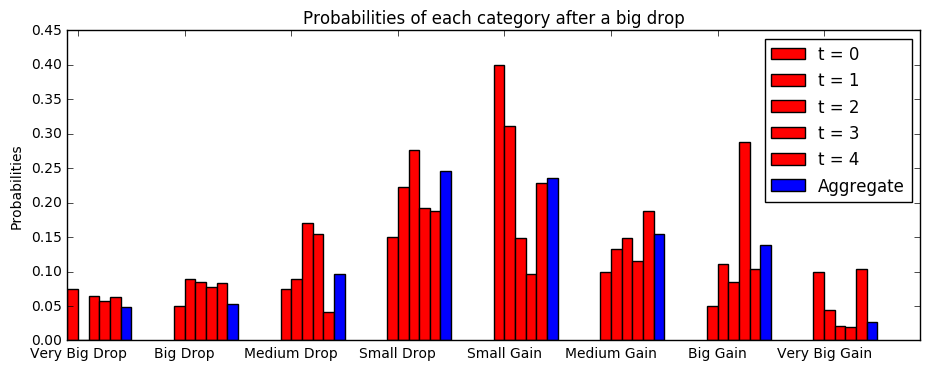

In [15]:
plot_full(category_periods, 'bd', movement_categories)
plt.show()

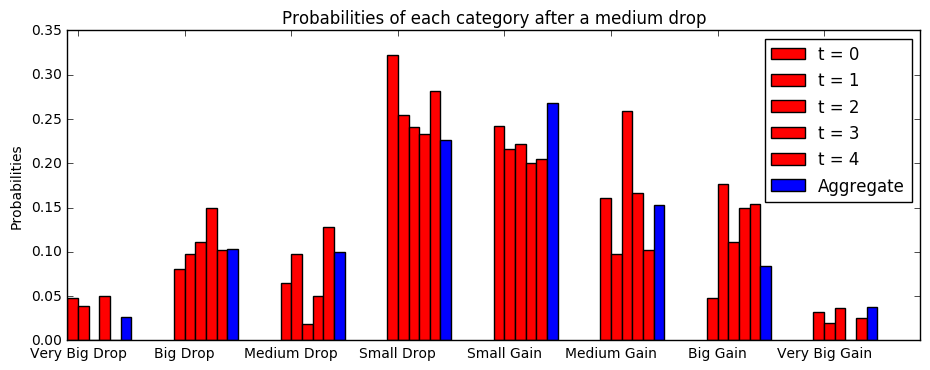

In [16]:
plot_full(category_periods, 'md', movement_categories)
plt.show()

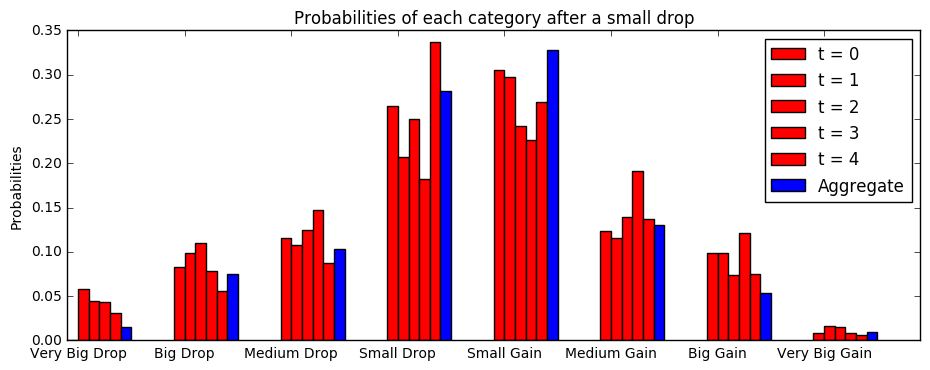

In [17]:
plot_full(category_periods, 'sd', movement_categories)
plt.show()

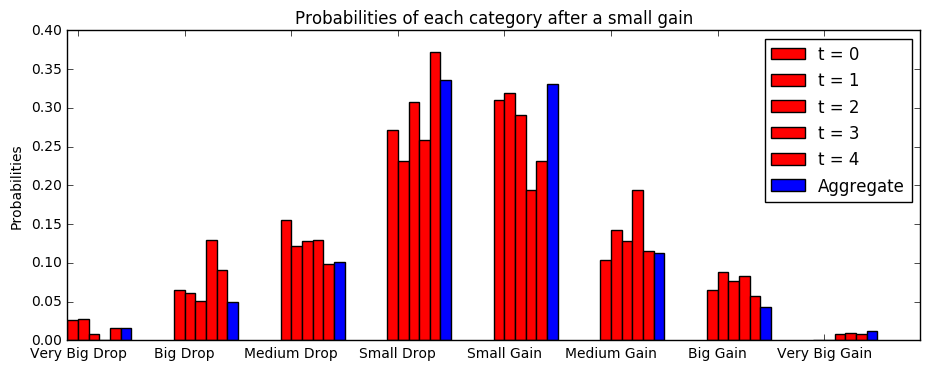

In [18]:
plot_full(category_periods, 'sg', movement_categories)
plt.show()

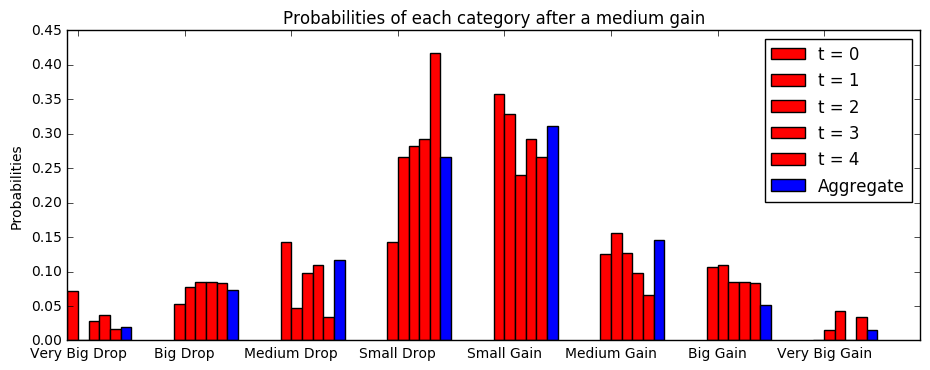

In [19]:
plot_full(category_periods, 'mg', movement_categories)
plt.show()

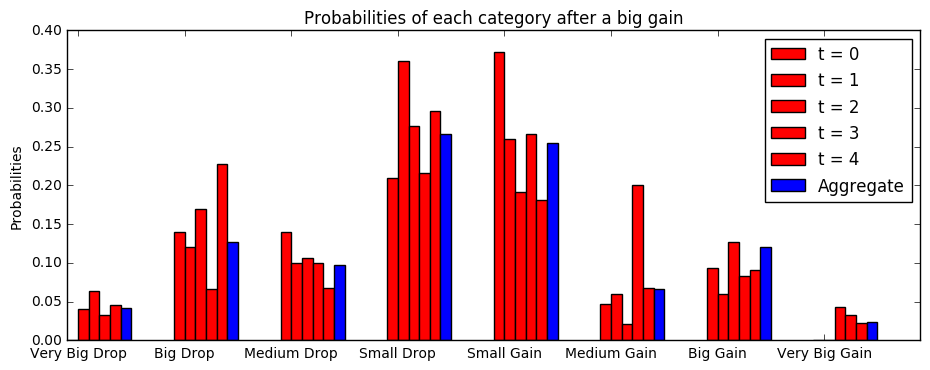

In [20]:
plot_full(category_periods, 'bg', movement_categories)
plt.show()

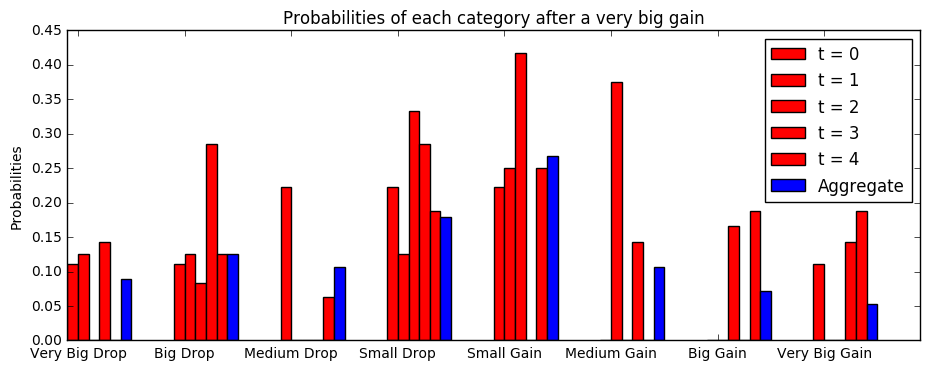

In [21]:
plot_full(category_periods, 'vbg', movement_categories)
plt.show()

## SPY: Let's look at the average over all periods seperately

In [22]:
categories = movement_categories

In [23]:
vbd_count = count_movement_category(categories, 'vbd')
bd_count = count_movement_category(categories, 'bd')
md_count = count_movement_category(categories, 'md')
sd_count = count_movement_category(categories, 'sd')
sg_count = count_movement_category(categories, 'sg')
mg_count = count_movement_category(categories, 'mg')
bg_count = count_movement_category(categories, 'bg')
vbg_count = count_movement_category(categories, 'vbg')
total_cat_count = len(categories)

p_vbd = vbd_count / total_cat_count
p_bd = bd_count / total_cat_count
p_md = md_count / total_cat_count
p_sd = sd_count / total_cat_count
p_sg = sg_count / total_cat_count
p_mg = mg_count / total_cat_count
p_bg = bg_count / total_cat_count
p_vbg = vbd_count / total_cat_count

cat_counts = [vbd_count, bd_count, md_count, sd_count, sg_count, mg_count, bg_count, vbg_count]
cat_probs = [p_vbd, p_bd, p_md, p_sd, p_sg, p_mg, p_bg, p_vbg]

two_day_trends = get_trends(categories, 2)

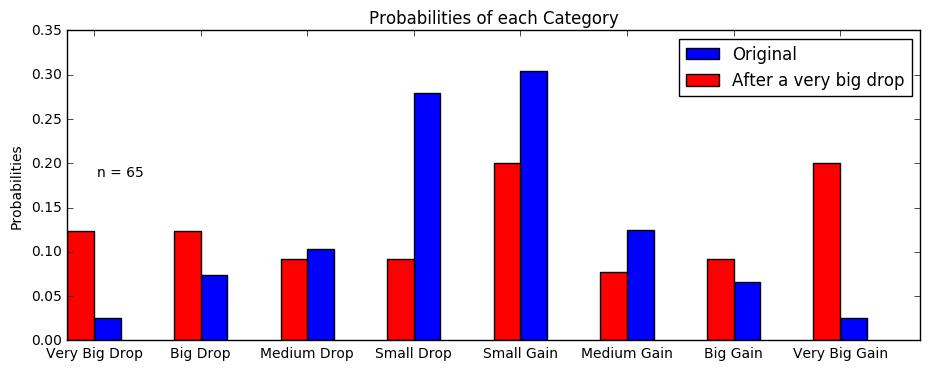

In [24]:
plot_two_day_probability_bar_graph('vbd', vbd_count, two_day_trends, cat_probs)
plt.show()

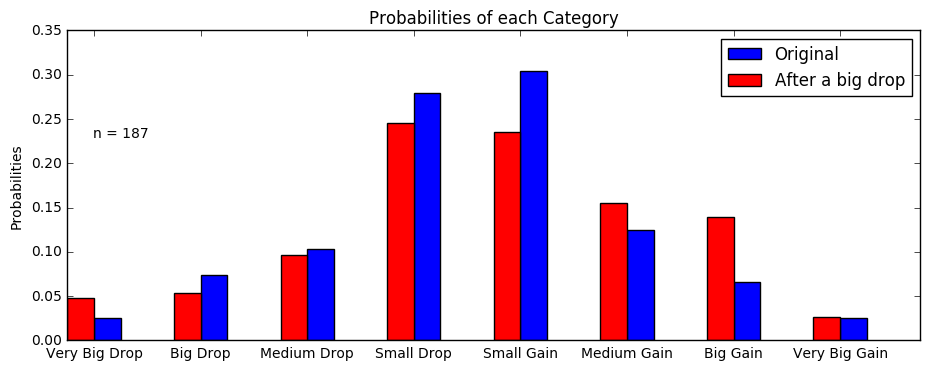

In [25]:
plot_two_day_probability_bar_graph('bd', bd_count, two_day_trends, cat_probs)
plt.show()

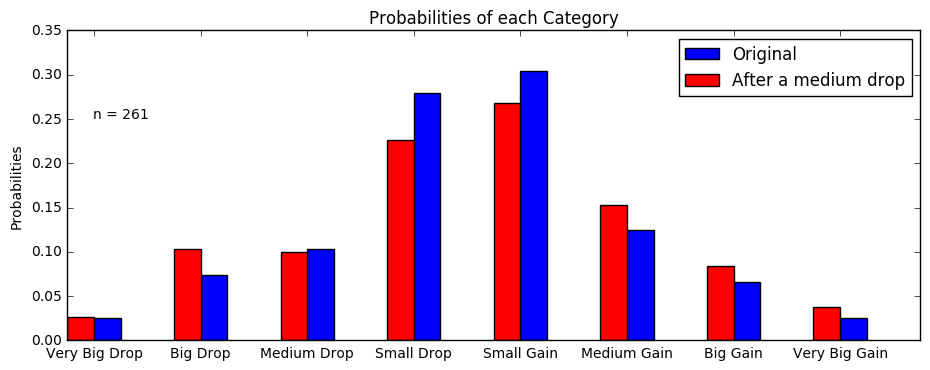

In [26]:
plot_two_day_probability_bar_graph('md', md_count, two_day_trends, cat_probs)
plt.show()

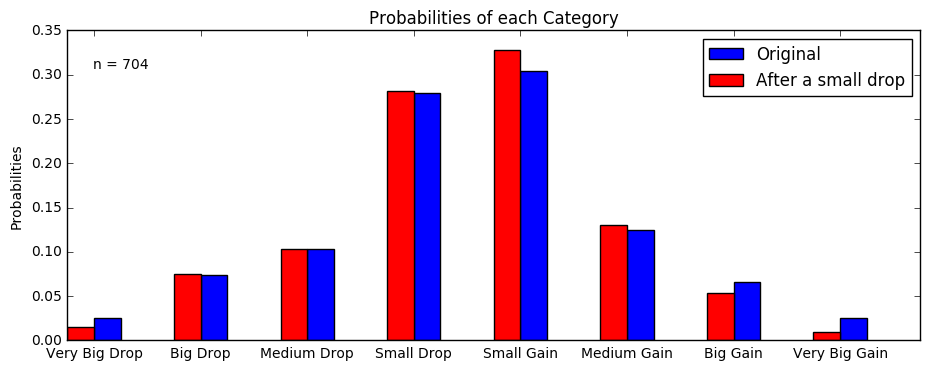

In [27]:
plot_two_day_probability_bar_graph('sd', sd_count, two_day_trends, cat_probs)
plt.show()

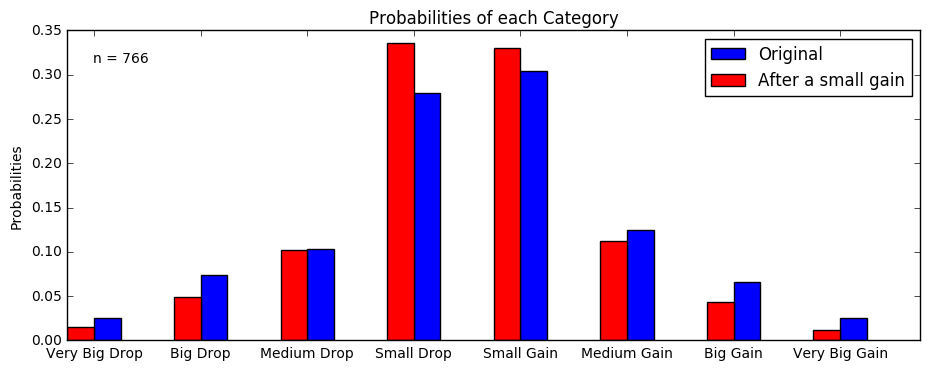

In [28]:
plot_two_day_probability_bar_graph('sg', sg_count, two_day_trends, cat_probs)
plt.show()

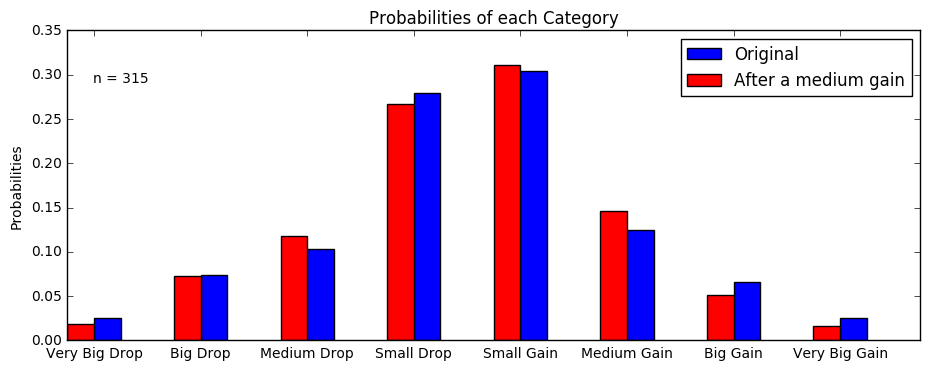

In [29]:
plot_two_day_probability_bar_graph('mg', mg_count, two_day_trends, cat_probs)
plt.show()

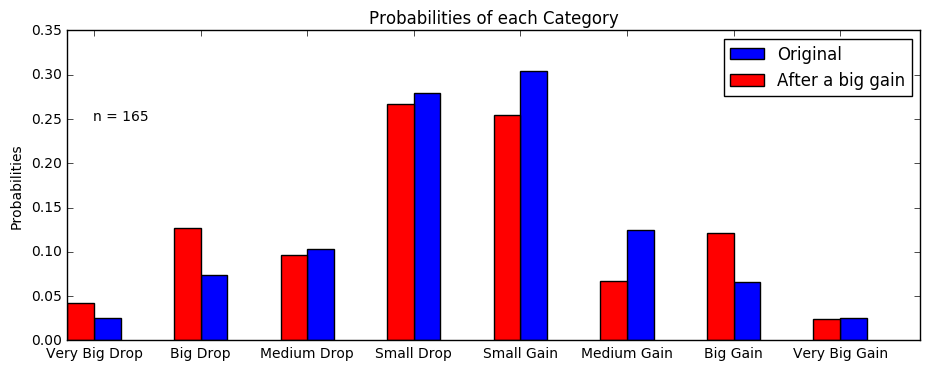

In [30]:
plot_two_day_probability_bar_graph('bg', bg_count, two_day_trends, cat_probs)
plt.show()

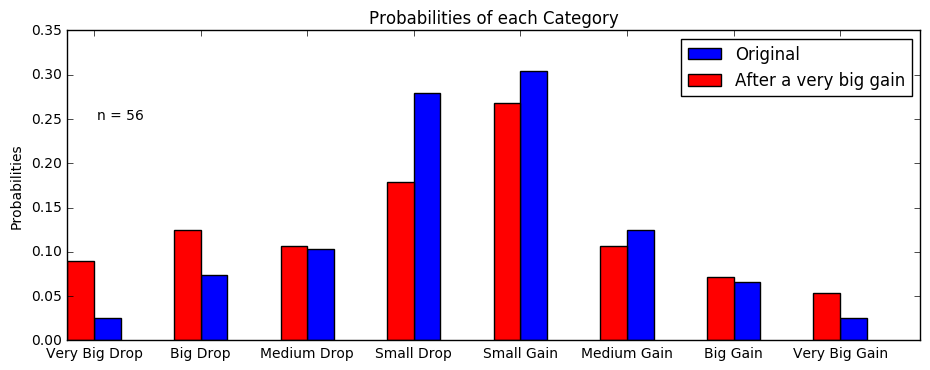

In [31]:
plot_two_day_probability_bar_graph('vbg', vbg_count, two_day_trends, cat_probs)
plt.show()